# __02__

In [ ]:
import os 
import sys
sys.path.append('../dependencies/')
import flopy
import matplotlib.pyplot as plt

In [18]:
exe_name = os.path.join('..','bin', 'mf6.exe')
org_workspace = os.path.join('..','models','symple_ex01')
workspace = os.path.join('..','models','symple_ex02')
sim = flopy.mf6.MFSimulation.load(sim_name='symple_ex02', exe_name=exe_name, sim_ws=org_workspace)
sim.set_sim_path(workspace)           # ____________________________ # 
gwf = sim.get_model("symp01")
# sim.write_simulation()

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package rch...
    loading package riv...
    loading package oc...
  loading solution package symp01...


In [19]:
pkg_list = gwf.get_package_list()
print(pkg_list)

['DIS', 'IC', 'NPF', 'RCH', 'RIV_0', 'OC']


In [7]:
npf = gwf.get_package('npf')
npf.k

Layer_1{constant 5.0}
Layer_2{constant 0.1}
Layer_3{constant 10.0}

In [17]:
# sim.write_simulation()

In [8]:
sim.run_simulation()

FloPy is using the following executable to run the model: ..\..\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.1 02/18/2021

   MODFLOW 6 compiled Feb 18 2021 08:24:05 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be held liable for any damages resulting from its 
authorized or unauthorized use. Also refer to the USGS Water 
Resources Soft

(True, [])

In [10]:
hds = gwf.output.head()
heads = hds.get_data(idx=0)
cbb = gwf.output.budget()
spdis = cbb.get_data(text="SPDIS")[0]
qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)

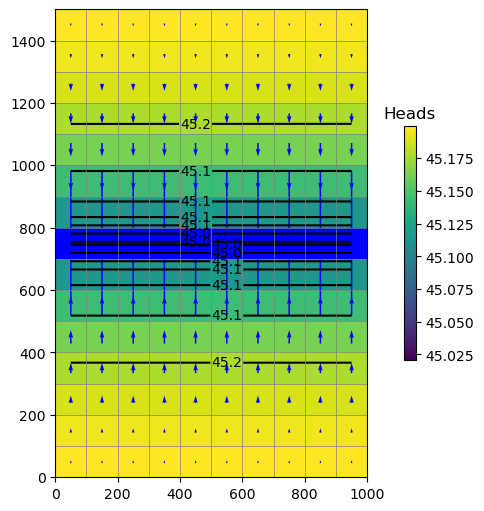

In [16]:
fig = plt.figure(figsize=(5, 5), constrained_layout=True)
mm = flopy.plot.PlotMapView(model=gwf)
head_array = mm.plot_array(heads)
contours = mm.contour_array(heads, colors='black')
plt.clabel(contours, fmt="%2.1f")
cb = plt.colorbar(head_array, shrink=0.5, )
cb.ax.set_title('Heads')

mm.plot_bc('RIV', color='blue')
mm.plot_grid(lw=0.5)
quiver = mm.plot_vector(qx, qy, normalize=False, color='blue')